In [1]:
from example_agents import KissanMigo
from example_tools import S2SearchTool, AddPlantSeasonTool, AddSpeciesTool, AddVarietyTool, AddVegetationBedTool
from example_tools import AddUserTool, AddPlotTool, AddPlotSeasonTool, FetchPolygonWkt, S2SearchDbTool
from langchain.llms import OpenAI
from example_agents.config import config
from steamship import Steamship
import geopandas as gpd
client = Steamship()
OPENAI_KEY = config()

In [2]:
gdf = gpd.read_file('./europe_110.geojson')

<Axes: >

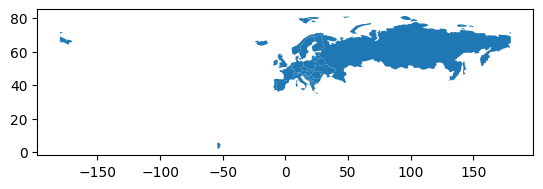

In [3]:
gdf.plot()

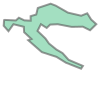

In [15]:
gdf.geometry[16]

In [16]:
gdf.geometry[16].simplify(tolerance=0.9).wkt

'POLYGON ((18.829838087650046 45.908877671891844, 19.00548628101012 44.86023366960916, 15.750026075918981 44.818711656262565, 18.450016310304818 42.47999136002932, 13.656975538801191 45.13693512631596, 16.564808383864943 46.50375092221981, 18.829838087650046 45.908877671891844))'

In [11]:
llm = OpenAI(client=client, openai_api_key=OPENAI_KEY, model='text-davinci-003', temperature=0)

tools = [S2SearchTool(), AddUserTool(), AddPlotTool(), AddVegetationBedTool(), 
         AddPlotSeasonTool(), AddPlantSeasonTool(),
         AddSpeciesTool(), AddVarietyTool(), FetchPolygonWkt(), S2SearchDbTool()]

In [12]:
kissanmigo = KissanMigo(tools, llm,  max_execution_time=1, early_stopping_method="generate")

In [13]:
prompt = "who are you?"
kissanmigo.agent.run(prompt)



> Entering new  chain...
Action:
```
{
  "action": "Final Answer",
  "action_input": "I am a bot designed to help you with your farming needs."
}
```


> Finished chain.


'I am a bot designed to help you with your farming needs.'

In [16]:
print(kissanmigo.agent.agent.llm_chain.prompt.messages[0].prompt.template)

Respond to the human as helpfully and accurately as possible. You have access to the following tools:

s2_image: don't use this for plots in the database.                   use this tool when you need to return a vegetation index map from sentinel2 satellite imagery.                    the user needs to give you a Polygon or MultiPolygon of their farm or plot and a range of dates.                    , args: {{{{'polygon': {{{{'title': 'Polygon', 'type': 'string'}}}}, 'vi': {{{{'title': 'Vi', 'type': 'string'}}}}, 'start_date': {{{{'title': 'Start Date', 'type': 'string'}}}}, 'end_date': {{{{'title': 'End Date', 'type': 'string'}}}}}}}}
add_user: use this tool when you need to add a user to the database.                   You should ask the user for his full name and email. After adding the user you should                     tell them that they can now add a plot or a vegetation bed., args: {{{{'full_name': {{{{'title': 'Full Name', 'type': 'string'}}}}, 'email': {{{{'title': 'Email', 

In [17]:
prompt = "what should I do to use you?"
kissanmigo.agent.run(prompt)



> Entering new  chain...
Action:
```
{
  "action": "Final Answer",
  "action_input": "To use me, you can ask me questions about the database and I can help you with tasks such as adding users, plots, vegetation beds, and species. I can also help you with tasks such as returning vegetation index maps from Sentinel2 satellite imagery."
}
```


> Finished chain.


'To use me, you can ask me questions about the database and I can help you with tasks such as adding users, plots, vegetation beds, and species. I can also help you with tasks such as returning vegetation index maps from Sentinel2 satellite imagery.'

In [18]:
prompt = "state all the things you can help me with"
kissanmigo.agent.run(prompt)



> Entering new  chain...
Action:
```
{
  "action": "Final Answer",
  "action_input": "I can help you with adding users, plots, vegetation beds, plot seasons, plant seasons, species, varieties, and converting polygons to text format."
}
```


> Finished chain.


'I can help you with adding users, plots, vegetation beds, plot seasons, plant seasons, species, varieties, and converting polygons to text format.'

In [19]:
prompt = "state all the things you can provide"
kissanmigo.agent.run(prompt)



> Entering new  chain...
Action:
```
{
  "action": "Final Answer",
  "action_input": "I can provide you with tools to add users, plots, vegetation beds, plot seasons, plant seasons, species, and varieties to the database. I can also provide you with tools to convert polygons in the database to text format and to return a vegetation index map from sentinel2 satellite imagery."
}
```


> Finished chain.


'I can provide you with tools to add users, plots, vegetation beds, plot seasons, plant seasons, species, and varieties to the database. I can also provide you with tools to convert polygons in the database to text format and to return a vegetation index map from sentinel2 satellite imagery.'

<h1>Add a user</h1>

In [14]:
prompt = f"HI can you add me to your users with name test2 and email test2@test.com"
kissanmigo.agent.run(prompt)



> Entering new  chain...

Action:
```
{
  "action": "add_user",
  "action_input": {
    "full_name": "test2",
    "email": "test2@test.com"
  }
}
```

Observation: None
Thought:

Action:
```
{
  "action": "Final Answer",
  "action_input": "I have added you to the database. You can now add a plot or a vegetation bed."
}
```



> Finished chain.


'I have added you to the database. You can now add a plot or a vegetation bed.'

<h1>Add a plot</h1>

In [17]:
plot = 'POLYGON ((18.829838087650046 45.908877671891844, 19.00548628101012 44.86023366960916, 15.750026075918981 44.818711656262565, 18.450016310304818 42.47999136002932, 13.656975538801191 45.13693512631596, 16.564808383864943 46.50375092221981, 18.829838087650046 45.908877671891844))'
prompt = f"can you add the following 'p13' {plot} to test2@test.com"
kissanmigo.agent.run(prompt)



> Entering new  chain...

Action:
```
{
  "action": "add_plot",
  "action_input": {
    "name": "p13",
    "delimitation": "POLYGON ((18.829838087650046 45.908877671891844, 19.00548628101012 44.86023366960916, 15.750026075918981 44.818711656262565, 18.450016310304818 42.47999136002932, 13.656975538801191 45.13693512631596, 16.564808383864943 46.50375092221981, 18.829838087650046 45.908877671891844))",
    "email": "test2@test.com"
  }
}
```


Observation: None
Thought:

Action:
```
{
  "action": "Final Answer",
  "action_input": "I have added the plot 'p13' to the database for the user test2@test.com. You can now add a plot season or a vegetation bed."
}
```



> Finished chain.


"I have added the plot 'p13' to the database for the user test2@test.com. You can now add a plot season or a vegetation bed."



> Entering new  chain...

Action:
```
{
  "action": "database_s2_image",
  "action_input": {
    "plot_name": "farm",
    "user_email": "ghizlan.astaoui@gmail.com",
    "vi": "NDVI",
    "start_date": "2023-05-01",
    "end_date": "2023-06-01"
  }
}
```



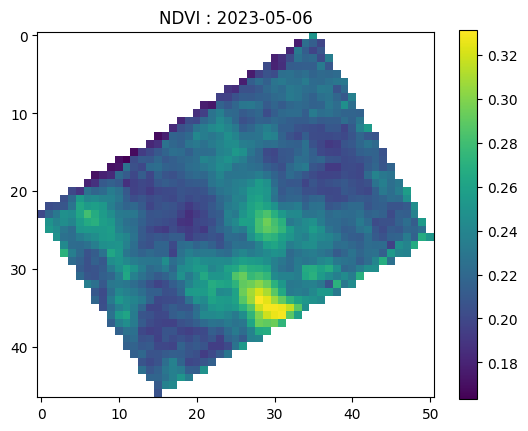


Observation: None
Thought:

Action:
```
{
  "action": "Final Answer",
  "action_input": "I have generated a NDVI map for the farm of ghizlan.astaoui@gmail.com between 2023-05-01 and 2023-06-01."
}
```



> Finished chain.


'I have generated a NDVI map for the farm of ghizlan.astaoui@gmail.com between 2023-05-01 and 2023-06-01.'

In [18]:
kissanmigo.agent.run('generate NDVI map for "farm" of ghizlan.astaoui@gmail.com between 2023-05-01 and 2023-06-01')

<h1>Add a species and variety</h1>

In [23]:
kissanmigo.agent.run('can you add the wheat species')



> Entering new  chain...
Action:
```
{
  "action": "add_species",
  "action_input": "wheat"
}
```

Observation: None
Thought:

Action:
```
{
  "action": "Final Answer",
  "action_input": "Yes, I can add the wheat species to the database."
}
```



> Finished chain.


'Yes, I can add the wheat species to the database.'

In [24]:
kissanmigo.agent.run('can you add the variety test to the wheat species')



> Entering new  chain...
Action:
```
{
  "action": "add_variety",
  "action_input": {
    "variety_name": "test",
    "species_name": "wheat"
  }
}
```

Observation: None
Thought:

Action:
```
{
  "action": "Final Answer",
  "action_input": "Variety test has been added to the wheat species."
}
```



> Finished chain.


'Variety test has been added to the wheat species.'

<h1>Add a plot season</h1>

In [5]:
kissanmigo.agent.run('add a 01-01-2022 to 01-01-2023 season to p1 of variety test owned by human@example.com')



> Entering new  chain...

Action:
```
{
  "action": "add_plot_season",
  "action_input": {
    "start_date": "01-01-2022",
    "end_date": "01-01-2023",
    "variety_name": "test",
    "plot_name": "p1",
    "email": "human@example.com"
  }
}
```


Observation: None
Thought:

Action:
```
{
  "action": "Final Answer",
  "action_input": "I have added a season from 01-01-2022 to 01-01-2023 to plot p1 of variety test owned by human@example.com"
}
```



> Finished chain.


'I have added a season from 01-01-2022 to 01-01-2023 to plot p1 of variety test owned by human@example.com'